In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

导入pandas numpy matplotlib

用pd.Series创建对象，它只有一列，索引由程序自动生成

In [5]:
s = pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


用pd.DataFrame可以创建多列数据表

In [8]:
df = pd.DataFrame(np.random.randn(6,4),columns=list('ABCD'))
print(df)

          A         B         C         D
0  0.629356  1.186796 -1.636572  1.337970
1  0.109559 -1.148689 -2.082819 -0.115893
2  0.527746  0.046948  0.076636 -1.050893
3 -0.990850 -1.513290  3.124437 -1.117682
4 -0.148350  0.462121  0.963671 -2.248079
5  0.738116 -0.529389  0.354351 -1.337248


如果参数是一个dict，每个dict的value会转化为一个Series

In [13]:
df2 = pd.DataFrame({'A':1,'B':pd.Timestamp('20180114'),'C':pd.Series([1,2]*2),'D':np.array([3]*4)})
print(df2)

   A          B  C  D
0  1 2018-01-14  1  3
1  1 2018-01-14  2  3
2  1 2018-01-14  1  3
3  1 2018-01-14  2  3


可以有很多方式查看数据

In [14]:
print(df.head())#查看数据头几行，默认查看头5行
print(df.tail())#查看数据尾几行，默认查看尾5行
print(df.describe())#查看每列的统计数据
print(df.info())#查看每列的数据类型

          A         B         C         D
0  0.629356  1.186796 -1.636572  1.337970
1  0.109559 -1.148689 -2.082819 -0.115893
2  0.527746  0.046948  0.076636 -1.050893
3 -0.990850 -1.513290  3.124437 -1.117682
4 -0.148350  0.462121  0.963671 -2.248079
          A         B         C         D
1  0.109559 -1.148689 -2.082819 -0.115893
2  0.527746  0.046948  0.076636 -1.050893
3 -0.990850 -1.513290  3.124437 -1.117682
4 -0.148350  0.462121  0.963671 -2.248079
5  0.738116 -0.529389  0.354351 -1.337248
              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.144263 -0.249251  0.133284 -0.755304
std    0.649668  1.014029  1.883195  1.230965
min   -0.990850 -1.513290 -2.082819 -2.248079
25%   -0.083873 -0.993864 -1.208270 -1.282356
50%    0.318652 -0.241221  0.215494 -1.084287
75%    0.603954  0.358327  0.811341 -0.349643
max    0.738116  1.186796  3.124437  1.337970
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (

DataFrame内部是用numpy储存的，可以单独打印index和columns

In [18]:
print(df.index)
print(df.columns)
print(df.values)

RangeIndex(start=0, stop=6, step=1)
Index(['A', 'B', 'C', 'D'], dtype='object')
[[ 0.62935646  1.18679642 -1.63657226  1.3379703 ]
 [ 0.10955859 -1.14868945 -2.08281941 -0.11589319]
 [ 0.52774633  0.04694752  0.07663626 -1.05089271]
 [-0.99084977 -1.51329016  3.12443674 -1.11768194]
 [-0.14835018  0.46212058  0.96367111 -2.24807938]
 [ 0.73811632 -0.52938865  0.35435118 -1.33724795]]


DataFrame可以很容易就按某一列进行排序

In [21]:
print(df.sort_values(by='B'))

          A         B         C         D
3 -0.990850 -1.513290  3.124437 -1.117682
1  0.109559 -1.148689 -2.082819 -0.115893
5  0.738116 -0.529389  0.354351 -1.337248
2  0.527746  0.046948  0.076636 -1.050893
4 -0.148350  0.462121  0.963671 -2.248079
0  0.629356  1.186796 -1.636572  1.337970


从DataFrame有多种方式获取行和列

In [40]:
print(df['A'])
print(df[0:3])#可以用类似numpy的方法获取
print(df[ (df['B']>0)])


0    0.629356
1    0.109559
2    0.527746
3   -0.990850
4   -0.148350
5    0.738116
Name: A, dtype: float64
          A         B         C         D
0  0.629356  1.186796 -1.636572  1.337970
1  0.109559 -1.148689 -2.082819 -0.115893
2  0.527746  0.046948  0.076636 -1.050893
          A         B         C         D
0  0.629356  1.186796 -1.636572  1.337970
2  0.527746  0.046948  0.076636 -1.050893
4 -0.148350  0.462121  0.963671 -2.248079


可以用loc方法，用索引来获取行列

In [41]:
print(df.loc[0:3,['A','B']])#获取A，B行的所有列，其中行跟列分别用逗号分隔，此处的0:3是索引值，在DataFrame中此值可以设为其他数字或变量
print(df.loc[(df['A']>0) & (df['B']>0)])

          A         B
0  0.629356  1.186796
1  0.109559 -1.148689
2  0.527746  0.046948
3 -0.990850 -1.513290
          A         B         C         D
0  0.629356  1.186796 -1.636572  1.337970
2  0.527746  0.046948  0.076636 -1.050893


可以用iloc方法，通过整数下标的方法获取行列

In [43]:
print(df.iloc[0:3])#此处0:3就是0-3行，包括第三行
print(df.iloc[0:2,0:2])#输出0-2行，0-2列

          A         B         C         D
0  0.629356  1.186796 -1.636572  1.337970
1  0.109559 -1.148689 -2.082819 -0.115893
2  0.527746  0.046948  0.076636 -1.050893
          A         B
0  0.629356  1.186796
1  0.109559 -1.148689


可以用isin函数挑出包含某个值的行

In [46]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
print(df2)
print(df2[df2['E'].isin(['two','three'])])

          A         B         C         D      E
0  0.629356  1.186796 -1.636572  1.337970    one
1  0.109559 -1.148689 -2.082819 -0.115893    one
2  0.527746  0.046948  0.076636 -1.050893    two
3 -0.990850 -1.513290  3.124437 -1.117682  three
4 -0.148350  0.462121  0.963671 -2.248079   four
5  0.738116 -0.529389  0.354351 -1.337248  three
          A         B         C         D      E
2  0.527746  0.046948  0.076636 -1.050893    two
3 -0.990850 -1.513290  3.124437 -1.117682  three
5  0.738116 -0.529389  0.354351 -1.337248  three


用loc方法挑出行和列后，赋值也非常简单

In [63]:
df2.loc[df2['A']>0,['A']] = 1
df2.loc[df2['A']<0,['A']] = -1
print(df2)

     A         B         C         D  E
0  1.0  1.186796 -1.636572  1.337970  1
1  1.0 -1.148689 -2.082819 -0.115893  1
2  1.0  0.046948  0.076636 -1.050893  1
3 -1.0 -1.513290  3.124437 -1.117682  1
4 -1.0  0.462121  0.963671 -2.248079  1
5  1.0 -0.529389  0.354351 -1.337248  1


缺失值一般用NaN表示，处理缺失值的方法有多种

In [68]:
E = pd.Series([1,2,np.nan,3,np.nan,4])
df2['E'] = E
print(df2)

     A         B         C         D    E
0  1.0  1.186796 -1.636572  1.337970  1.0
1  1.0 -1.148689 -2.082819 -0.115893  2.0
2  1.0  0.046948  0.076636 -1.050893  NaN
3 -1.0 -1.513290  3.124437 -1.117682  3.0
4 -1.0  0.462121  0.963671 -2.248079  NaN
5  1.0 -0.529389  0.354351 -1.337248  4.0


In [71]:
print(df2.dropna())#删除包含缺失值的行
print(df2.fillna(99))#缺失值用99代替
print(df2.isnull())#用布尔值表示数据是否缺失

     A         B         C         D    E
0  1.0  1.186796 -1.636572  1.337970  1.0
1  1.0 -1.148689 -2.082819 -0.115893  2.0
3 -1.0 -1.513290  3.124437 -1.117682  3.0
5  1.0 -0.529389  0.354351 -1.337248  4.0
     A         B         C         D     E
0  1.0  1.186796 -1.636572  1.337970   1.0
1  1.0 -1.148689 -2.082819 -0.115893   2.0
2  1.0  0.046948  0.076636 -1.050893  99.0
3 -1.0 -1.513290  3.124437 -1.117682   3.0
4 -1.0  0.462121  0.963671 -2.248079  99.0
5  1.0 -0.529389  0.354351 -1.337248   4.0
       A      B      C      D      E
0  False  False  False  False  False
1  False  False  False  False  False
2  False  False  False  False   True
3  False  False  False  False  False
4  False  False  False  False   True
5  False  False  False  False  False


Group是pandas一个比较好的功能，可以将数据按不同列分组

In [73]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
print(df)

     A      B         C         D
0  foo    one  1.168524  0.678967
1  bar    one  2.355531  0.101427
2  foo    two -0.654319 -0.650751
3  bar  three  0.586599  1.538395
4  foo    two -0.764113 -0.197873
5  bar    two  1.475903  1.474302
6  foo    one  2.511095  0.566545
7  foo  three  0.121238  0.619929


In [82]:
print(df.groupby('A').mean())#将数据中A值相同的数据分成一组，再求mean
print(df.groupby(['A','B']).sum())#将数据中A和B值都相同的数据分成一组，再求sum

            C         D
A                      
bar  1.472678  1.038041
foo  0.476485  0.203364
                  C         D
A   B                        
bar one    2.355531  0.101427
    three  0.586599  1.538395
    two    1.475903  1.474302
foo one    3.679619  1.245512
    three  0.121238  0.619929
    two   -1.418432 -0.848623


pandas另一强大的功能是可视化，可以利用matplotlib绘制简单的图

          A         B
0 -1.086123  0.872584
1 -0.412281  1.597947
2  0.061370  1.135882
3 -0.874508  0.218450
4 -0.100618  0.510832
5  1.577165 -2.562004
6  0.107558  0.602162
7 -0.138369  2.144317
8  0.689548 -1.844944
9 -0.359631  1.526853


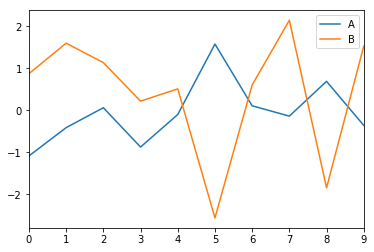

In [104]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(10,2), columns=list('AB'))

print(df)
df.plot()

plt.show()

plot默认是绘画折线图，除此之外可以用plot(kind='')改变样式，包括：
>* bar 条形图
>* hist 直方图
>* boxplot 盒形图
>* area 面积图
>* scatter 散点图

          a         b
0  0.931857  0.669250
1  0.590954  0.928967
2  0.511700  0.619746
3  0.833791  0.023494
4  0.284540  0.185807
5  0.211308  0.490545
6  0.413806  0.977588
7  0.351612  0.848414
8  0.528836  0.407761
9  0.456605  0.276113


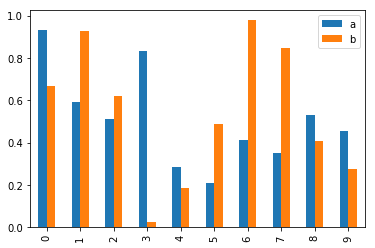

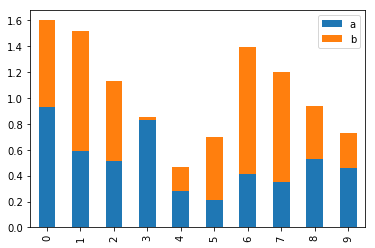

In [118]:
df = pd.DataFrame(np.random.rand(10,2),columns=['a','b'])
print(df)
df.plot(kind='bar')
df.plot(kind='bar',stacked='True')#stacked='True'可以生成堆积图
plt.show()

以下代码可以用于画直方图

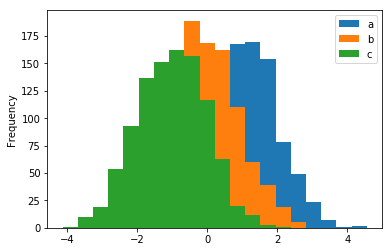

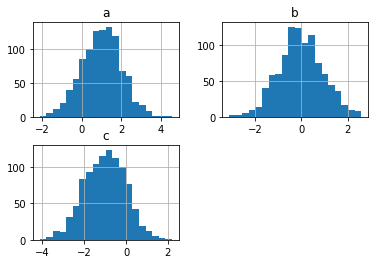

In [123]:
df = pd.DataFrame({'a':np.random.randn(1000)+1,'b':np.random.randn(1000),'c':
np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

df.plot(kind='hist',bins=20)#hist用于画直方图，可以用bins指定bin数目
df.hist(bins=20)#用于为每列数据单独画直方图
plt.show()

以下代码可以用于画散点图

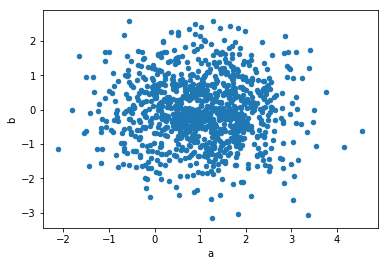

In [124]:
df.plot(kind='scatter',x='a',y='b')
plt.show()

以下代码可以用于画饼图

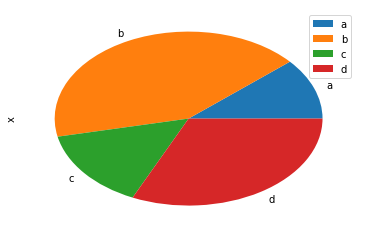

In [133]:
df = pd.DataFrame(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], columns=['x'])
df.plot(kind='pie',subplots=True)
plt.show()
